# k-Means Clustering

### Setting up the environment

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import HTML
from celluloid import Camera
%matplotlib inline
plt.rcParams['figure.figsize'] = [8, 8]
sns.set()
np.random.seed(20)

### Generating data

In [2]:
# Parameters
num_dims = 2
gen_k = 5
gen_class_centre_means = 20. * np.random.random((gen_k, num_dims)) - 10.
gen_class_centre_covs = ((5. * np.random.random((gen_k, 1))) @ np.eye(num_dims)[:, None, :]).transpose(1, 0, 2)
gen_num_class_points = 40

num_data_points = gen_k * gen_num_class_points

In [3]:
# Generating the data
X = np.zeros((num_data_points, num_dims))
y = np.zeros((num_data_points,), dtype=int)
for i in range(gen_k):
    ind_slice = (i * gen_num_class_points) + np.arange(gen_num_class_points, dtype=int)
    X[ind_slice] = np.random.multivariate_normal(gen_class_centre_means[i], gen_class_centre_covs[i], (gen_num_class_points,))
    y[ind_slice] = i

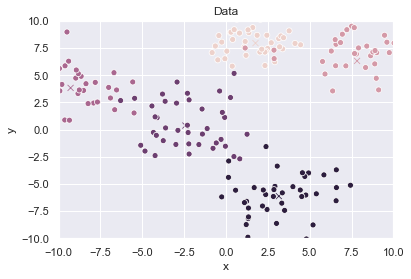

In [4]:
# Visualization
fig_data = plt.figure()
plt.xlabel('x')
plt.xlim((-10, 10))
plt.ylabel('y')
plt.ylim((-10, 10))
plt.title('Data')
ax = sns.scatterplot(x=gen_class_centre_means[:, 0], y=gen_class_centre_means[:, 1], hue=np.arange(gen_k), marker='x', legend=False)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, legend=False, ax=ax)
plt.show()

### Clustering

In [5]:
# Parameters
k = 5

In [6]:
# Clustreing
trace_centres = []
trace_y = []

iteration = 0
last_y = np.zeros((num_data_points,), dtype=int)
y = np.random.randint(0, k, (num_data_points,))
trace_y.append(y.copy())
centres = np.zeros((k, num_dims))
for i in np.arange(k):
    centres[i, :] = np.average(X[y == i, :], 0)
trace_centres.append(centres.copy())

while np.any(y != last_y):
    iteration += 1
    distances_sq = np.sum((np.tile(X[:, :, None], (1, 1, k)) - np.tile(centres[:, :, None].transpose((2, 1, 0)), (num_data_points, 1, 1))) ** 2, 1)
    last_y = y
    y = np.argmin(distances_sq, 1)
    trace_y.append(y.copy())
    for i in np.arange(k):
        cluster_data_points = X[y == i, :]
        if cluster_data_points.shape[0] > 0:
            centres[i, :] = np.average(cluster_data_points, 0)
        else:
            centres[i, :] = X[np.random.randint(0, num_data_points), :]
    trace_centres.append(centres.copy())
print("k-Means finished after " + str(iteration) + " iterations.")

k-Means finished after 10 iterations.


In [7]:
%%capture
# Creating animated vissualization
fig = plt.figure()
camera = Camera(fig)
plt.xlabel('x')
plt.ylabel('y')

plt.title('k-Means clustering')

for i in range(iteration):
    y = trace_y[i]
    centres = trace_centres[i]
    ax = sns.scatterplot(x=centres[:, 0], y=centres[:, 1], hue=np.arange(gen_k), marker='x', legend=False)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, legend=False, ax=ax)
    plt.xlim((-10, 10))
    plt.ylim((-10, 10))
    camera.snap()

animation = camera.animate()
plt.show()

In [8]:
# Playing the animation
HTML(animation.to_jshtml())